# Links to Explore

http://www.claudiobellei.com/2016/11/15/changepoint-frequentist/

http://www.claudiobellei.com/2017/01/25/changepoint-bayesian/

https://www.zinkov.com/posts/2017-11-03-simpsons-changepoint/

http://docs.pymc.io/notebooks/getting_started#Case-study-2:-Coal-mining-disasters

In [1]:
import pymc3 as pm
import theano.tensor as tt
import numpy as np
import pandas as pd
from scipy.stats import norm

import matplotlib.pyplot as plt

np.random.seed(1337)

%matplotlib inline

/export/scratch/miniconda3/envs/theano/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
# http://www.claudiobellei.com/2016/11/15/changepoint-frequentist/
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "http://www.claudiobellei.com/2016/11/15/changepoint-frequentist/fig1.png")

In [3]:
Image(url= "http://www.claudiobellei.com/2016/11/15/changepoint-frequentist/fig2.png")

In [4]:
def plot_data(data, type="ts",p=None, xlabel="Episode Number", ylabel="Rating"):
    fig = plt.figure(figsize=(10,6))
    n = len(data)
    plt.plot(np.arange(1,n+1),data)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.ylim([0.9*np.min(data),1.1*np.max(data)])
    fig.set_tight_layout(True)
    plt.show()

/export/scratch/miniconda3/envs/theano/lib/python3.6/site-packages/matplotlib/figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


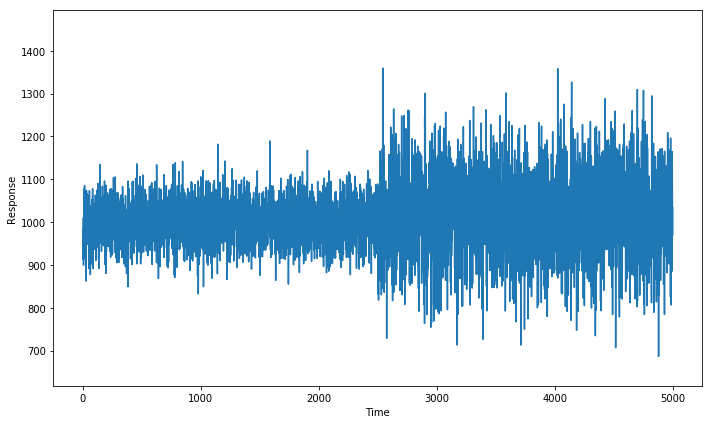

In [5]:
# Change in standard deviation
size1 = 2500
size2 = 2500
scale1 = 50 #standard deviation of distribution function
scale2 = 100 #standard deviation of distribution function
loc1 = 1000 #mean of normal for first part
loc2 = 1020 #mean of normal for second part
d1 = norm.rvs(loc=loc1,size=size1,scale=scale1)
d2 = norm.rvs(loc=loc2,size=size2,scale=scale2)
data = np.concatenate((d1,d2),axis=0)


plot_data(data, xlabel="Time", ylabel="Response")

In [6]:
def maximum_likelihood(data):
    n = data.shape[0]
    switch = np.arange(1, n+1)
    likelihoods = np.zeros(n)
    for switchpoint in np.arange(1, n+1):
        mean_1 = data[:switchpoint].mean()
        std_1 = data[:switchpoint].std()
        likelihood_1 = norm.logpdf(data[:switchpoint], loc=mean_1, scale=std_1).sum()
        
        mean_2 = data[switchpoint:].mean()
        std_2 = data[switchpoint:].std()
        likelihood_2 = norm.logpdf(data[switchpoint:], loc=mean_2, scale=std_2).sum()
        
        likelihoods[switchpoint-1] = likelihood_1 + likelihood_2
    return likelihoods        

In [7]:
likes = maximum_likelihood(data)

/export/scratch/miniconda3/envs/theano/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: Mean of empty slice.
  # Remove the CWD from sys.path while we load stuff.
/export/scratch/miniconda3/envs/theano/lib/python3.6/site-packages/numpy/core/_methods.py:135: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)


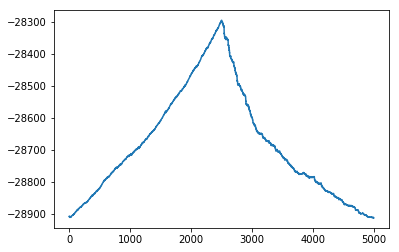

In [8]:
plt.plot(likes[np.isfinite(likes)])

In [9]:
likes[np.isfinite(likes)].argmax()

2501

/export/scratch/miniconda3/envs/theano/lib/python3.6/site-packages/matplotlib/figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


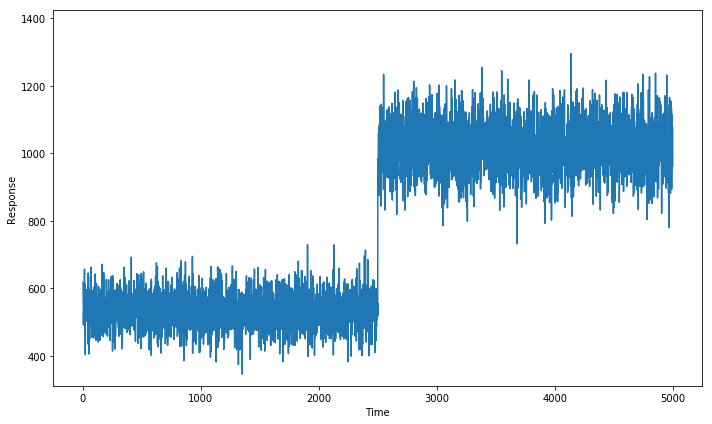

In [10]:
# Change in mean
size1 = 2500
size2 = 2500
scale1 = 50 #standard deviation of distribution function
scale2 = 75 #standard deviation of distribution function
loc1 = 535 #mean of normal for first part
loc2 = 1020 #mean of normal for second part
d1 = norm.rvs(loc=loc1,size=size1,scale=scale1)
d2 = norm.rvs(loc=loc2,size=size2,scale=scale2)
data = np.concatenate((d1,d2),axis=0)


plot_data(data, xlabel="Time", ylabel="Response")

In [11]:
likes = maximum_likelihood(data)

/export/scratch/miniconda3/envs/theano/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: Mean of empty slice.
  # Remove the CWD from sys.path while we load stuff.
/export/scratch/miniconda3/envs/theano/lib/python3.6/site-packages/numpy/core/_methods.py:135: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)


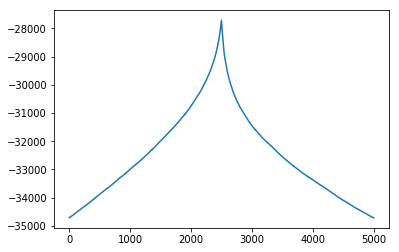

In [12]:
plt.plot(likes[np.isfinite(likes)])

In [13]:
likes[np.isfinite(likes)].argmax()

2498

In [14]:
# %load http://www.claudiobellei.com/2016/11/15/changepoint-frequentist/changepoint.py

In [15]:
# %load http://www.claudiobellei.com/2017/01/25/changepoint-bayesian/changepoint_bayesian.py

In [16]:
# http://www.claudiobellei.com/2016/11/15/changepoint-frequentist/
# http://www.claudiobellei.com/2017/01/25/changepoint-bayesian/

In [17]:
from IPython.display import IFrame
IFrame('http://www.changepoint.info/', width=1600, height=900)

In [18]:
# Available for download here https://datasets.imdbws.com/
# Description of files are here https://www.imdb.com/interfaces/

df_basics = pd.read_csv("https://datasets.imdbws.com/title.basics.tsv.gz", compression="gzip", sep="\t", index_col=0)
df_episodes = pd.read_csv("https://datasets.imdbws.com/title.episode.tsv.gz", compression="gzip", sep="\t", index_col=0)
df_ratings = pd.read_csv("https://datasets.imdbws.com/title.ratings.tsv.gz", compression="gzip", sep="\t", index_col=0)

# basics = pd.read_csv("../../title.basics.tsv.gz", compression="gzip", sep="\t", index_col=0)
# episodes = pd.read_csv("../../title.episode.tsv.gz", compression="gzip", sep="\t", index_col=0)
# ratings = pd.read_csv("../../title.ratings.tsv.gz", compression="gzip", sep="\t", index_col=0)

/export/scratch/miniconda3/envs/theano/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [19]:
df_basics.head()

,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
tconst,,,,,,,,
tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short"
tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short"
tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance"
tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,\N,"Animation,Short"
tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,Short


In [20]:
df_merged = df_basics.join(df_episodes).join(df_ratings)

In [21]:
df_merged.head()

,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,parentTconst,seasonNumber,episodeNumber,averageRating,numVotes
tconst,,,,,,,,,,,,,
tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short",NaN,NaN,NaN,5.8,1384.0
tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short",NaN,NaN,NaN,6.5,162.0
tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance",NaN,NaN,NaN,6.6,971.0
tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,\N,"Animation,Short",NaN,NaN,NaN,6.4,98.0
tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,Short,NaN,NaN,NaN,6.2,1664.0


In [22]:
tvseries_basics = df_basics[df_basics["titleType"] == "tvseries"]

In [23]:
dexter = "tt0773262"
lawnorder = "tt0098844"

In [24]:
cols = ["seasonNumber", "episodeNumber", "averageRating"]
df_merged[cols] = df_merged[cols].apply(pd.to_numeric, errors='coerce')

In [25]:
colsort = ["parentTconst", "seasonNumber", "episodeNumber"]
df_merged = df_merged.sort_values(colsort)

In [26]:
df_merged = df_merged.dropna(subset=cols)

In [27]:
df_basics[df_basics.index == 'tt0084987']

,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
tconst,,,,,,,,
tt0084987,tvSeries,The Bill,The Bill,0,1984,2010,50,"Crime,Drama"


In [28]:
tv = df_merged[(df_merged["titleType"] == "tvEpisode") & ~(df_merged['originalTitle'].str.contains('#') & (df_merged['numVotes'] > 50))]
top_shows = tv.groupby('parentTconst').size().reset_index()
top_shows = top_shows[top_shows[0] > 200]['parentTconst'].tolist()
tv[tv['parentTconst'].isin(top_shows)].groupby('parentTconst')['averageRating'].std().reset_index().sort_values('averageRating',ascending=False)

,parentTconst,averageRating
75,tt0103569,2.175257
133,tt0320037,1.586824
49,tt0081961,1.394140
128,tt0288937,1.378023
152,tt0437729,1.361210
58,tt0092325,1.279050
25,tt0057733,1.171584
115,tt0206512,1.161851
164,tt0759364,1.081458
94,tt0121220,1.024037


In [29]:
def plot_switchpoint(data, parentTconst):
    series_data = data[data["parentTconst" ]== parentTconst]
    series_data = series_data[series_data["titleType"] == "tvEpisode"]
    lower = 1
    upper = series_data.shape[0]
    
    data = np.array(series_data["averageRating"].values, dtype=np.float32)
    with pm.Model() as model:
        switch = pm.DiscreteUniform('switch', lower=lower, upper=upper)
        early_sigma = pm.HalfNormal('early_sigma', sd=2.5, testval=1.)
        early_mu = pm.Uniform('early_mu', lower=data.min(), upper=data.max())

        late_sigma = pm.HalfNormal('late_sigma', sd=2.5, testval=1.)
        late_mu = pm.Uniform('late_mu', lower=data.min(), upper=data.max())

        
        
        early_mean = pm.Normal('early_mean', mu=early_mu, sd=early_sigma)
        late_mean = pm.Normal('late_mean', mu=late_mu, sd=late_sigma)
        mean = tt.switch(switch >= np.arange(upper)+1, early_mean, late_mean)
        
        ratings = pm.Normal('ratings', mu=mean, sd=1.,
                            observed=np.array(series_data["averageRating"].values, dtype=np.float32))

        for RV in model.basic_RVs:
            print(RV.name, RV.logp(model.test_point))
            
        
        tr = pm.sample(10000, tune=500, cores=4)
        

        pm.traceplot(tr)
    return tr, series_data

In [30]:
def plot_trace_data(tr, data):
    n = len(data)
    plt.figure(figsize=(10, 8))
    plt.plot(np.arange(1,n+1), data, '.')
    plt.ylabel("Average Rating", fontsize=16)
    plt.xlabel("Episode", fontsize=16)

    plt.vlines(tr['switch'].mean(), data.min(), data.max(), color='C1')
    average_data = np.zeros_like(data, dtype='float')
    for i in np.arange(n):
        idx = i < tr['switch']
        average_data[i] = (tr['early_mean'][idx].sum() + tr['late_mean'][~idx].sum()) / (len(tr) * tr.nchains)

    sp_hpd = pm.hpd(tr['switch'])
    plt.fill_betweenx(y=[data.min(), data.max()],
                      x1=sp_hpd[0], x2=sp_hpd[1], alpha=0.5, color='C1');
    plt.plot(np.arange(1,n+1), average_data,  'k--', lw=2);
    plt.show()

/export/scratch/miniconda3/envs/theano/lib/python3.6/site-packages/matplotlib/figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


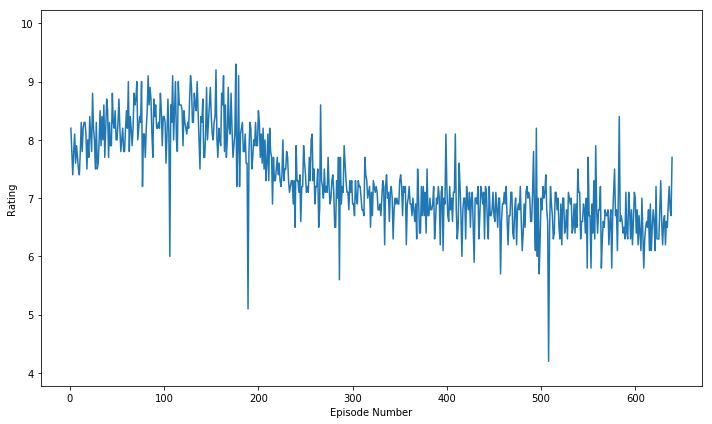

In [31]:
# simpsons
# https://www.zinkov.com/posts/2017-11-03-simpsons-changepoint/
simpons_tt = "tt0096697"

series_data = df_merged[df_merged["parentTconst" ]== simpons_tt]
series_data = series_data[series_data["titleType"] == "tvEpisode"]

plot_data(series_data["averageRating"])

switch -6.459904454377535
early_sigma_log__ -1.2220820845188824
early_mu_interval__ -1.3862943611198906
late_sigma_log__ -1.2220820845188824
late_mu_interval__ -1.3862943611198906
early_mean -0.9189385332046727
late_mean -0.9189385332046727
ratings -880.6004837232081


Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [switch]
>NUTS: [late_mean, early_mean, late_mu, late_sigma, early_mu, early_sigma]
100%|██████████| 10500/10500 [00:46<00:00, 226.07it/s]
There were 961 divergences after tuning. Increase `target_accept` or reparameterize.
There were 937 divergences after tuning. Increase `target_accept` or reparameterize.
There were 1111 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.7170540513091335, but should be close to 0.8. Try to increase the number of tuning steps.
There were 1120 divergences after tuning. Increase `target_accept` or reparameterize.
The number of effective samples is smaller than 10% for some parameters.


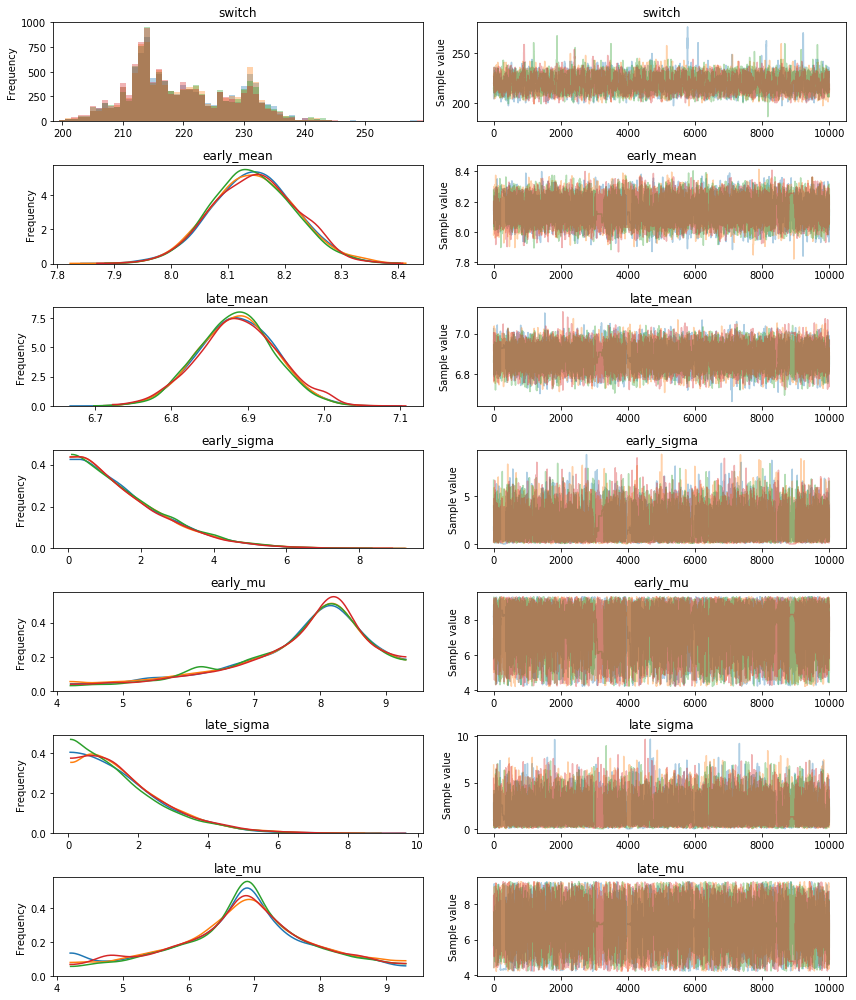

In [32]:
tr, series_data = plot_switchpoint(df_merged, simpons_tt)

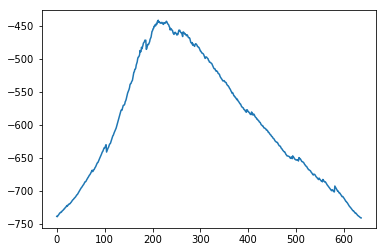

212


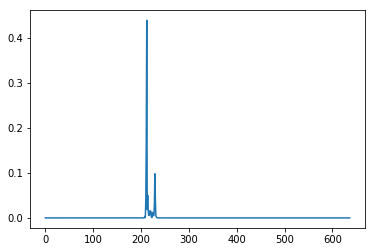

In [33]:
likes = maximum_likelihood(series_data["averageRating"])

likes = likes[np.isfinite(likes)]
plt.plot(likes)
plt.show()
likes = np.exp(likes)
likes_norm = likes/likes.sum()

print(likes_norm.argmax())
plt.plot(likes_norm)
plt.show()

219


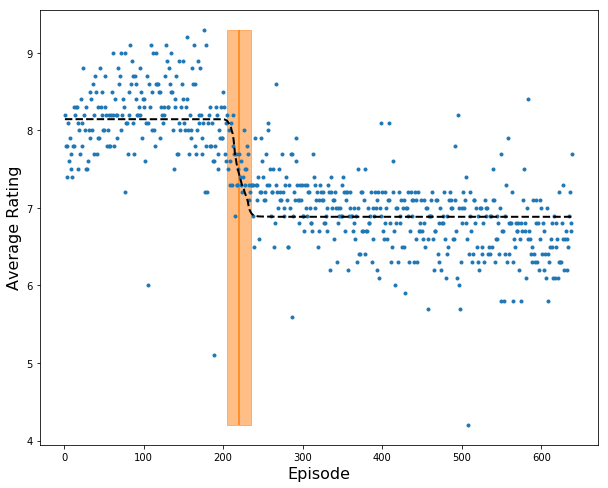

In [34]:
print(int(tr['switch'].mean()))
plot_trace_data(tr, series_data["averageRating"])

In [35]:
series_data.iloc[int(tr['switch'].mean()), :]

titleType                  tvEpisode
primaryTitle      Maximum Homerdrive
originalTitle     Maximum Homerdrive
isAdult                            0
startYear                       1999
endYear                           \N
runtimeMinutes                    30
genres              Animation,Comedy
parentTconst               tt0096697
seasonNumber                      10
episodeNumber                     17
averageRating                    7.7
numVotes                        1108
Name: tt0781979, dtype: object

switch -6.073044534100405
early_sigma_log__ -1.2220820845188824
early_mu_interval__ -1.3862943611198906
late_sigma_log__ -1.2220820845188824
late_mu_interval__ -1.3862943611198906
early_mean -0.9189385332046727
late_mean -0.9189385332046727
ratings -1284.4218731878686


Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [switch]
>NUTS: [late_mean, early_mean, late_mu, late_sigma, early_mu, early_sigma]
100%|██████████| 10500/10500 [00:53<00:00, 197.80it/s]
There were 682 divergences after tuning. Increase `target_accept` or reparameterize.
There were 1722 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.6676764799921096, but should be close to 0.8. Try to increase the number of tuning steps.
There were 2542 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.5992543758235612, but should be close to 0.8. Try to increase the number of tuning steps.
There were 606 divergences after tuning. Increase `target_accept` or reparameterize.
The number of effective samples is smaller than 10% for some parameters.


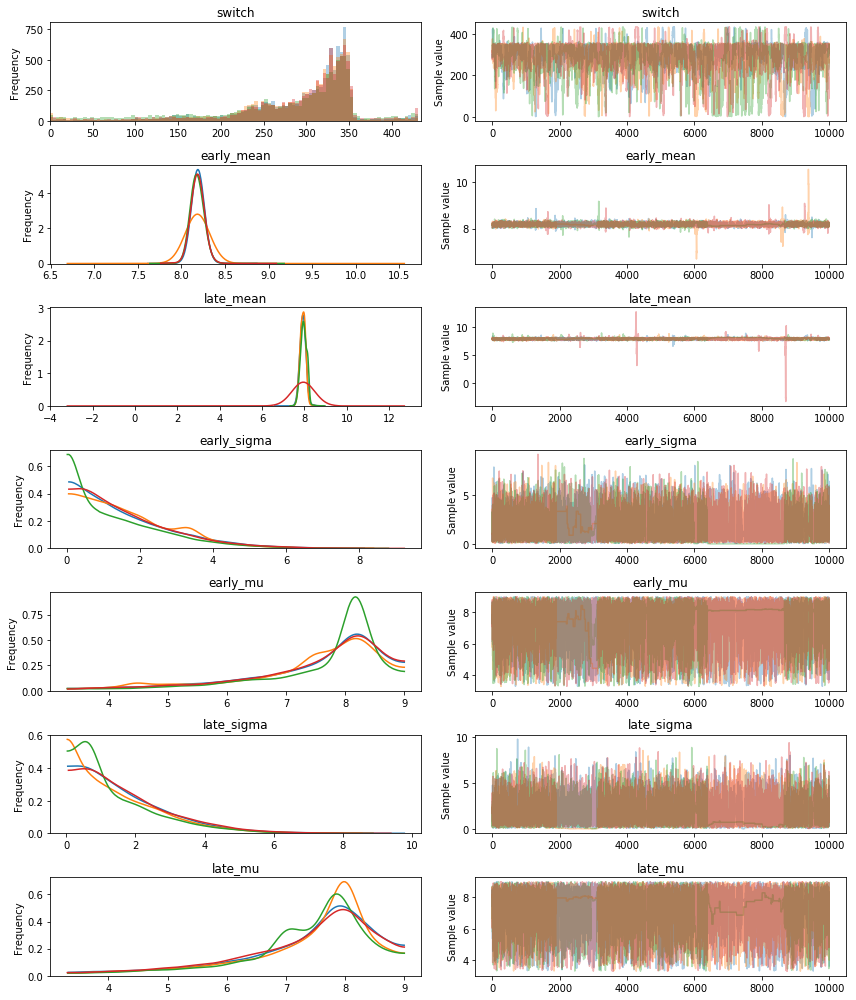

In [36]:
# Law and Order SVU
tr, series_data = plot_switchpoint(df_merged, "tt0203259")

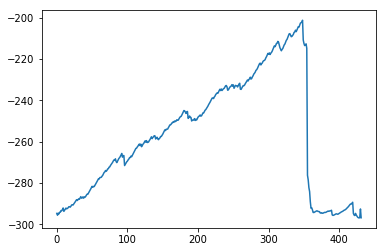

348


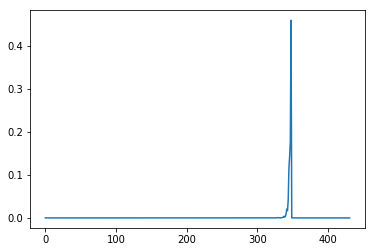

In [37]:
likes = maximum_likelihood(series_data["averageRating"])

likes = likes[np.isfinite(likes)]
plt.plot(likes)
plt.show()
likes = np.exp(likes)
likes_norm = likes/likes.sum()

print(likes_norm.argmax())
plt.plot(likes_norm)
plt.show()

288


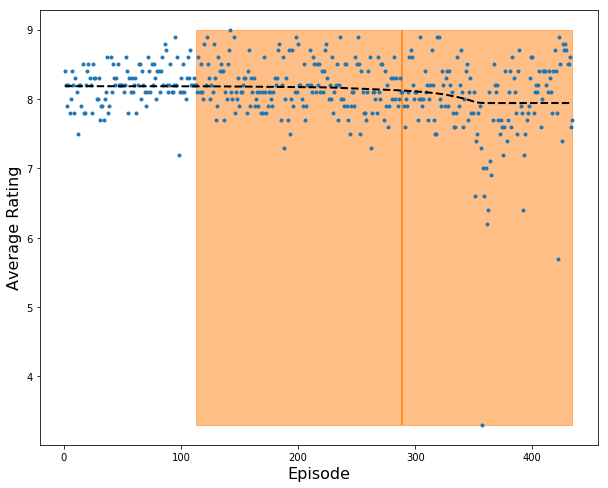

In [38]:
print(int(tr['switch'].mean()))
plot_trace_data(tr, series_data["averageRating"])

switch -4.564348191467836
early_sigma_log__ -1.2220820845188824
early_mu_interval__ -1.3862943611198906
late_sigma_log__ -1.2220820845188824
late_mu_interval__ -1.3862943611198906
early_mean -0.9189385332046727
late_mean -0.9189385332046727
ratings -191.6630744493422


Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [switch]
>NUTS: [late_mean, early_mean, late_mu, late_sigma, early_mu, early_sigma]
100%|██████████| 10500/10500 [00:45<00:00, 232.45it/s]
There were 1296 divergences after tuning. Increase `target_accept` or reparameterize.
There were 996 divergences after tuning. Increase `target_accept` or reparameterize.
There were 979 divergences after tuning. Increase `target_accept` or reparameterize.
There were 874 divergences after tuning. Increase `target_accept` or reparameterize.
The number of effective samples is smaller than 10% for some parameters.


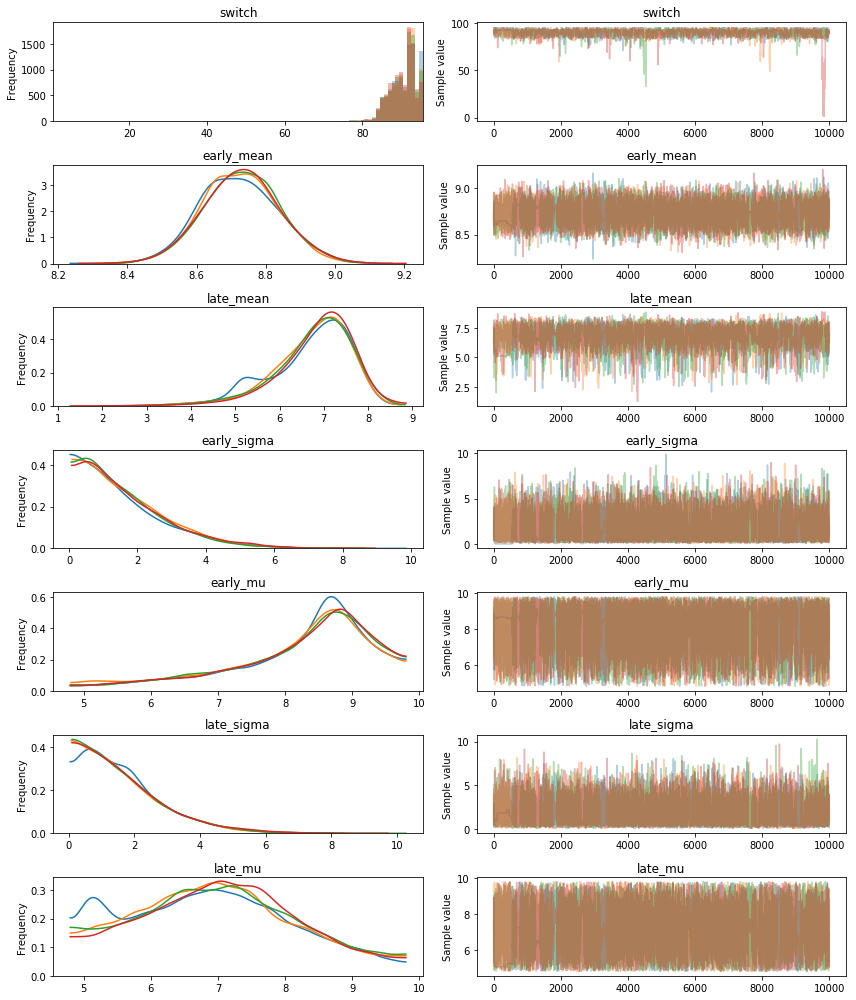

In [39]:
# Dexter
tr, series_data = plot_switchpoint(df_merged, dexter)

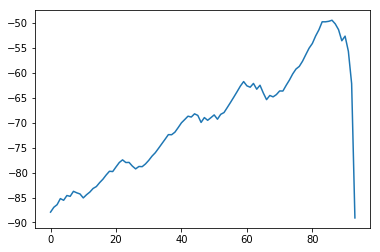

86


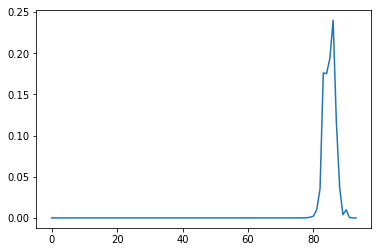

In [40]:
likes = maximum_likelihood(series_data["averageRating"])

likes = likes[np.isfinite(likes)]
plt.plot(likes)
plt.show()
likes = np.exp(likes)
likes_norm = likes/likes.sum()

print(likes_norm.argmax())
plt.plot(likes_norm)
plt.show()

90


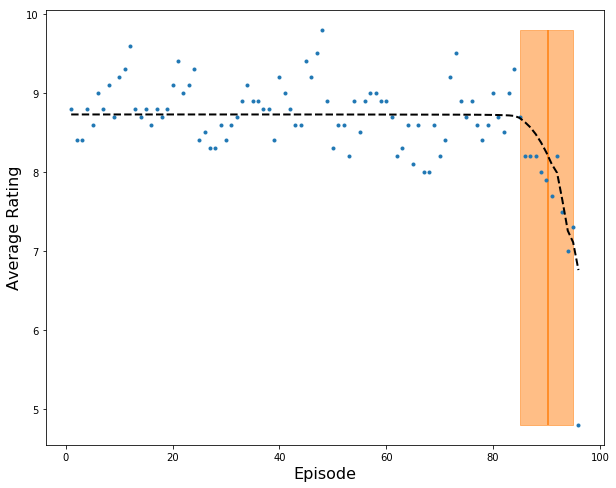

In [41]:
print(int(tr['switch'].mean()))
plot_trace_data(tr, series_data["averageRating"])

In [42]:
series_data.iloc[int(tr['switch'].mean()), :]

titleType                   tvEpisode
primaryTitle               Dress Code
originalTitle              Dress Code
isAdult                             0
startYear                        2013
endYear                            \N
runtimeMinutes                     53
genres            Crime,Drama,Mystery
parentTconst                tt0773262
seasonNumber                        8
episodeNumber                       7
averageRating                     7.7
numVotes                         2832
Name: tt2578776, dtype: object

switch -5.262690188904886
early_sigma_log__ -1.2220820845188824
early_mu_interval__ -1.3862943611198906
late_sigma_log__ -1.2220820845188824
late_mu_interval__ -1.3862943611198906
early_mean -0.9189385332046727
late_mean -0.9189385332046727
ratings -248.54638785502624


Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [switch]
>NUTS: [late_mean, early_mean, late_mu, late_sigma, early_mu, early_sigma]
100%|██████████| 10500/10500 [00:41<00:00, 250.60it/s]
There were 1007 divergences after tuning. Increase `target_accept` or reparameterize.
There were 1504 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.7077217130868245, but should be close to 0.8. Try to increase the number of tuning steps.
There were 1961 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.6603079544814598, but should be close to 0.8. Try to increase the number of tuning steps.
There were 964 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.7027062321984999, but should be close to 0.8. Try to increase the number of tuning 

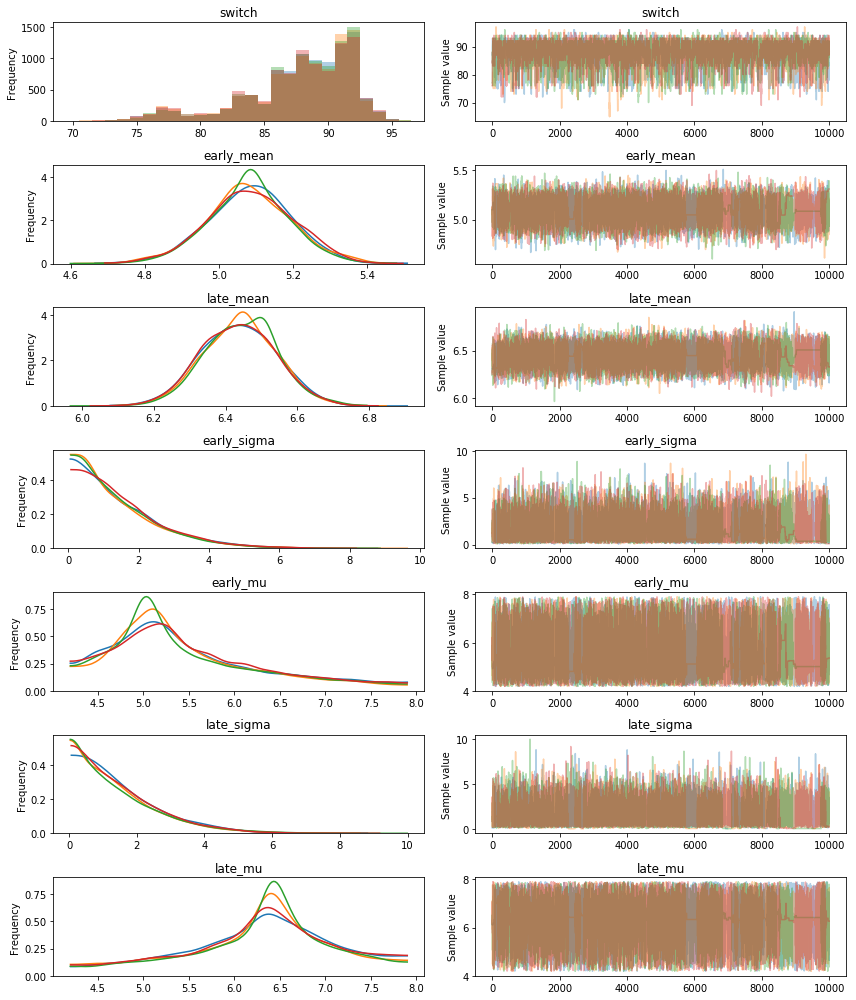

In [43]:
apprentice_tt = "tt0364782"
tr, series_data = plot_switchpoint(df_merged, apprentice_tt)

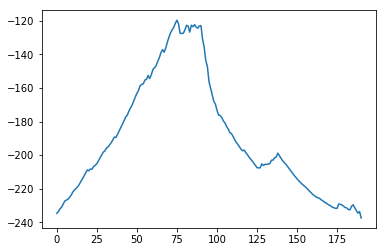

75


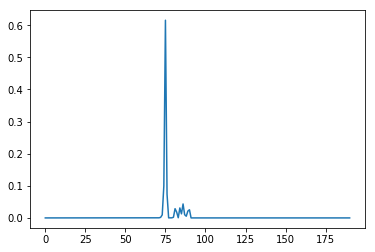

In [44]:
likes = maximum_likelihood(series_data["averageRating"])

likes = likes[np.isfinite(likes)]
plt.plot(likes)
plt.show()
likes = np.exp(likes)
likes_norm = likes/likes.sum()

print(likes_norm.argmax())
plt.plot(likes_norm)
plt.show()

87


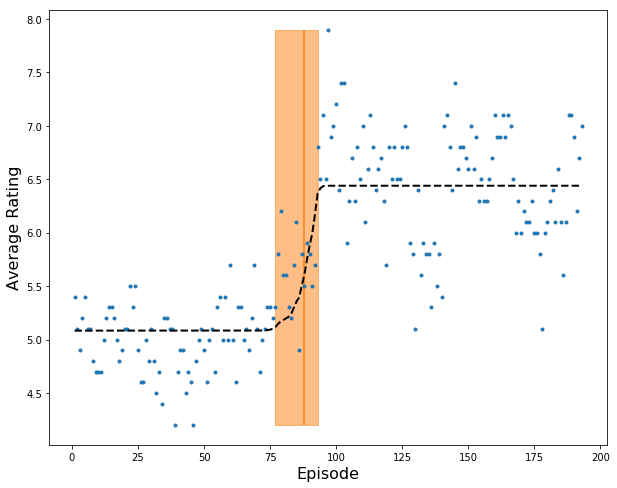

In [45]:
print(int(tr['switch'].mean()))
plot_trace_data(tr, series_data["averageRating"])

In [46]:
series_data.iloc[int(tr['switch'].mean()), :]

titleType                     tvEpisode
primaryTitle      Girls on Rollerskates
originalTitle     Girls on Rollerskates
isAdult                               0
startYear                          2007
endYear                              \N
runtimeMinutes                       \N
genres             Game-Show,Reality-TV
parentTconst                  tt0364782
seasonNumber                          6
episodeNumber                        10
averageRating                       5.5
numVotes                             15
Name: tt0997850, dtype: object

In [47]:
def seed_maximum_likelihood(data):
    n = data.shape[0]
    switch = np.arange(1, n+1)
    likelihoods = np.zeros(n)
    mean_1s = np.zeros(n)
    std_1s = np.zeros(n)
    mean_2s = np.zeros(n)
    std_2s = np.zeros(n)

    for switchpoint in np.arange(1, n+1):
        mean_1 = data[:switchpoint].mean()
        std_1 = data[:switchpoint].std()
        likelihood_1 = norm.logpdf(data[:switchpoint], loc=mean_1, scale=std_1).sum()
        
        mean_1s[switchpoint-1] = mean_1
        std_1s[switchpoint-1] = std_1
        
        mean_2 = data[switchpoint:].mean()
        std_2 = data[switchpoint:].std()
        likelihood_2 = norm.logpdf(data[switchpoint:], loc=mean_2, scale=std_2).sum()
        
        mean_2s[switchpoint-1] = mean_2
        std_2s[switchpoint-1] = std_2
        
        likelihoods[switchpoint-1] = likelihood_1 + likelihood_2
    likelihoods = likelihoods[np.isfinite(likelihoods)]
    switch = likelihoods.argmax()
    
    return switch, mean_1s[switch], std_1s[switch], mean_2s[switch], std_2s[switch]      

In [48]:
def plot_seed_switchpoint(data, parentTconst):
    series_data = data[data["parentTconst" ]== parentTconst]
    series_data = series_data[series_data["titleType"] == "tvEpisode"]
    lower = 1
    upper = series_data.shape[0]
    
    data = np.array(series_data["averageRating"].values, dtype=np.float32)
    s_switch, s_early_mean, s_early_std, s_late_mean, s_late_std = seed_maximum_likelihood(data)
    with pm.Model() as model:
        switch = pm.DiscreteUniform('switch', lower=lower, upper=upper, testval=s_switch)
        early_sigma = pm.HalfNormal('early_sigma', sd=2.5, testval=s_early_std)
        early_mu = pm.Uniform('early_mu', lower=data.min(), upper=data.max(), testval=s_early_mean)

        late_sigma = pm.HalfNormal('late_sigma', sd=2.5, testval=s_late_std)
        late_mu = pm.Uniform('late_mu', lower=data.min(), upper=data.max(), testval=s_late_mean)

        
        
        early_mean = pm.Normal('early_mean', mu=early_mu, sd=early_sigma)
        late_mean = pm.Normal('late_mean', mu=late_mu, sd=late_sigma)
        mean = tt.switch(switch >= np.arange(upper)+1, early_mean, late_mean)
        
        ratings = pm.Normal('ratings', mu=mean, sd=1.,
                            observed=np.array(series_data["averageRating"].values, dtype=np.float32))

        for RV in model.basic_RVs:
            print(RV.name, RV.logp(model.test_point))
            
        
        tr = pm.sample(10000, tune=500, cores=4)
        

        pm.traceplot(tr)
    return tr, series_data

/export/scratch/miniconda3/envs/theano/lib/python3.6/site-packages/ipykernel_launcher.py:18: RuntimeWarning: Mean of empty slice.
/export/scratch/miniconda3/envs/theano/lib/python3.6/site-packages/numpy/core/_methods.py:135: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)


switch -6.459904454377535
early_sigma_log__ -1.843688491903888
early_mu_interval__ -1.7559837680781216
late_sigma_log__ -1.908695844088583
late_mu_interval__ -1.3895151587591532
early_mean -0.2378190677411483
late_mean -0.17022103146460738
ratings -662.4660606551331


Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [switch]
>NUTS: [late_mean, early_mean, late_mu, late_sigma, early_mu, early_sigma]
100%|██████████| 10500/10500 [00:40<00:00, 257.44it/s]
There were 1337 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.6963178657718941, but should be close to 0.8. Try to increase the number of tuning steps.
There were 1848 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.6778005319573306, but should be close to 0.8. Try to increase the number of tuning steps.
There were 2184 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.5964741355677577, but should be close to 0.8. Try to increase the number of tuning steps.
There were 1037 divergences after tuning. Increase `target_accept` or reparame

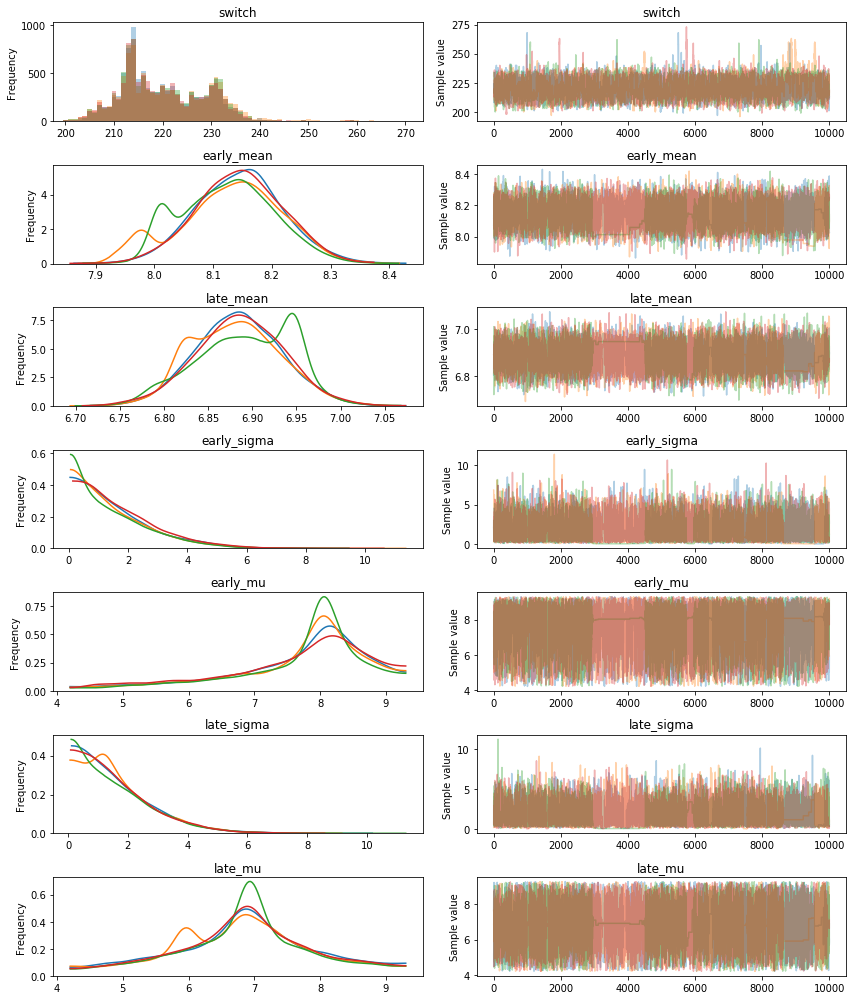

In [49]:
tr, series_data = plot_seed_switchpoint(df_merged, simpons_tt)

220


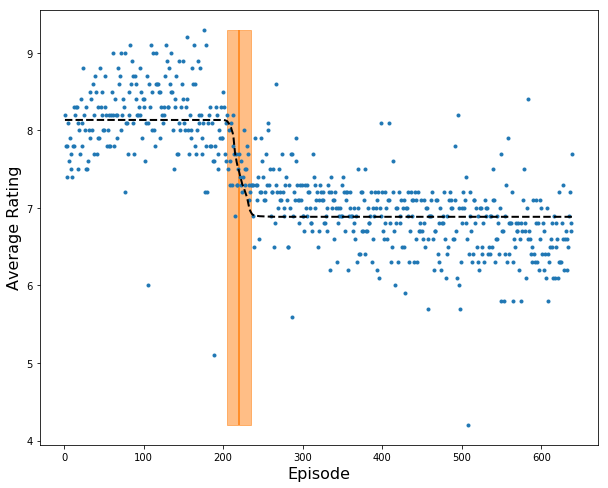

In [50]:
print(int(tr['switch'].mean()))
plot_trace_data(tr, series_data["averageRating"])

# Conclusion

Maximum Likelihood Pros
* Works equally as well with less work
* Need to derive custom maximum likelihood estimations

Bayesian Pros
* Returns a distribution of results
* Flexible with distributions
* Can be seeded with ML

Future Work
* Try with other distrubtions besides the Normal
* Extend to multiple switchpoints
* Detect the number of generating distributions with nonparametric Bayesian methods
* Test out ADVI instead of MCMC for speed